United States Census Income Classifcation

# Introduction

Trying to predict whethere someone makes over 50k or not 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.api.types import CategoricalDtype

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# to see all rows
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

<IPython.core.display.Javascript object>

In [3]:
columns = [
    "age",
    "workclass",
    "industry",
    "occupation",
    "education",
    "wage",
    "enroll_edu",
    "relationship",
    "major_industry_code",
    "major_occupation",
    "race",
    "hispanic_orgin",
    "sex",
    "member_labor_union",
    "reason_for_unemployment",
    "full_or_part_time_unemployment_stat",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "tax_filer_stat",
    "region_prev_res",
    "state_prev_res",
    "detail_household_and_family_stat",
    "detailed_household_summary_in_household",
    "instance_weight",
    "change_in_msa",
    "change_in_reg",
    "move_within_reg",
    "house_1yr",
    "mig_sunbelt",
    "num_employers",
    "family_members_under_18",
    "dad_country",
    "mom_country",
    "self_country",
    "citzenship",
    "SEOTR",
    "VETQVA",
    "VETYN",
    "weeks_worked",
    "year",
    "income",
]

train_data = pd.read_csv("census_income_learn.csv", names=columns, na_values=" ? ")
test_data = pd.read_csv("census_income_test.csv", names=columns, na_values=" ? ")

<IPython.core.display.Javascript object>

In [4]:
train_data.head()

,age,workclass,industry,occupation,education,wage,enroll_edu,relationship,major_industry_code,major_occupation,race,hispanic_orgin,sex,member_labor_union,reason_for_unemployment,full_or_part_time_unemployment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_prev_res,state_prev_res,detail_household_and_family_stat,detailed_household_summary_in_household,instance_weight,change_in_msa,change_in_reg,move_within_reg,house_1yr,mig_sunbelt,num_employers,family_members_under_18,dad_country,mom_country,self_country,citzenship,SEOTR,VETQVA,VETYN,weeks_worked,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


<IPython.core.display.Javascript object>

In [5]:
test_data.head()

,age,workclass,industry,occupation,education,wage,enroll_edu,relationship,major_industry_code,major_occupation,race,hispanic_orgin,sex,member_labor_union,reason_for_unemployment,full_or_part_time_unemployment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_prev_res,state_prev_res,detail_household_and_family_stat,detailed_household_summary_in_household,instance_weight,change_in_msa,change_in_reg,move_within_reg,house_1yr,mig_sunbelt,num_employers,family_members_under_18,dad_country,mom_country,self_country,citzenship,SEOTR,VETQVA,VETYN,weeks_worked,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


<IPython.core.display.Javascript object>

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                        199523 non-null int64
workclass                                  199523 non-null object
industry                                   199523 non-null int64
occupation                                 199523 non-null int64
education                                  199523 non-null object
wage                                       199523 non-null int64
enroll_edu                                 199523 non-null object
relationship                               199523 non-null object
major_industry_code                        199523 non-null object
major_occupation                           199523 non-null object
race                                       199523 non-null object
hispanic_orgin                             199523 non-null object
sex                                        199523 non-null object
member_labor_union                 

<IPython.core.display.Javascript object>

In [7]:
train_data.nunique()

age                                           91
workclass                                      9
industry                                      52
occupation                                    47
education                                     17
wage                                        1240
enroll_edu                                     3
relationship                                   7
major_industry_code                           24
major_occupation                              15
race                                           5
hispanic_orgin                                10
sex                                            2
member_labor_union                             3
reason_for_unemployment                        6
full_or_part_time_unemployment_stat            8
capital_gains                                132
capital_losses                               113
dividends_from_stocks                       1478
tax_filer_stat                                 6
region_prev_res     

<IPython.core.display.Javascript object>

In [8]:
train_data.describe()

,age,industry,occupation,wage,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_employers,SEOTR,VETYN,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


<IPython.core.display.Javascript object>

In [9]:
# Descriptive statistics for just text-based variables
train_data.describe(include=["O"])

,workclass,education,enroll_edu,relationship,major_industry_code,major_occupation,race,hispanic_orgin,sex,member_labor_union,reason_for_unemployment,full_or_part_time_unemployment_stat,tax_filer_stat,region_prev_res,state_prev_res,detail_household_and_family_stat,detailed_household_summary_in_household,change_in_msa,change_in_reg,move_within_reg,house_1yr,mig_sunbelt,family_members_under_18,dad_country,mom_country,self_country,citzenship,VETQVA,income
count,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523,199523
unique,9,17,3,7,24,15,5,10,2,3,6,8,6,6,51,38,8,10,9,10,3,4,5,43,43,43,5,3,2
top,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe,-50000
freq,100245,48407,186943,86485,100684,100684,167365,171907,103984,180459,193453,123769,75094,183750,183750,53248,75475,99696,99696,99696,101212,99696,144232,159163,160479,176989,176992,197539,187141


<IPython.core.display.Javascript object>

# Data Cleaning Process

In [10]:
# Getting rid of unnecessary spaces
train_data = train_data.replace(" ", "", regex=True)
test_data = test_data.replace(" ", "", regex=True)

<IPython.core.display.Javascript object>

In [11]:
# replacing notinuniverse and making nan values
train_data = train_data.replace(["Notinuniverse", "Notinuniverseorchildren"], np.nan)
test_data = test_data.replace(["Notinuniverse", "Notinuniverseorchildren"], np.nan)
# replacing question mark with unknown
train_data = train_data.replace(["?"], np.nan)
test_data = test_data.replace(["?"], np.nan)

<IPython.core.display.Javascript object>

In [12]:
# Looking at the percentage of null values in each column
train_data.isnull().sum() * 100 / train_data.isnull().count()

age                                         0.000000
workclass                                  50.242328
industry                                    0.000000
occupation                                  0.000000
education                                   0.000000
wage                                        0.000000
enroll_edu                                 93.694962
relationship                                0.000000
major_industry_code                        50.462353
major_occupation                           50.462353
race                                        0.000000
hispanic_orgin                              0.000000
sex                                         0.000000
member_labor_union                         90.445212
reason_for_unemployment                    96.957744
full_or_part_time_unemployment_stat         0.000000
capital_gains                               0.000000
capital_losses                              0.000000
dividends_from_stocks                       0.

<IPython.core.display.Javascript object>

In [13]:
# dropping columns with huge amount of null values and useless instance_weight and year columns
train_data.drop(
    [
        "enroll_edu",
        "member_labor_union",
        "reason_for_unemployment",
        "region_prev_res",
        "state_prev_res",
        "mig_sunbelt",
        "family_members_under_18",
        "instance_weight",
        "VETQVA",
        "year",
        "major_industry_code",
        "major_occupation",
        "workclass",
    ],
    axis=1,
    inplace=True,
)

# repeating the process for test data too
test_data.drop(
    [
        "enroll_edu",
        "member_labor_union",
        "reason_for_unemployment",
        "region_prev_res",
        "state_prev_res",
        "mig_sunbelt",
        "family_members_under_18",
        "instance_weight",
        "VETQVA",
        "year",
        "major_industry_code",
        "major_occupation",
        "workclass",
    ],
    axis=1,
    inplace=True,
)

<IPython.core.display.Javascript object>

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 29 columns):
age                                        199523 non-null int64
industry                                   199523 non-null int64
occupation                                 199523 non-null int64
education                                  199523 non-null object
wage                                       199523 non-null int64
relationship                               199523 non-null object
race                                       199523 non-null object
hispanic_orgin                             199523 non-null object
sex                                        199523 non-null object
full_or_part_time_unemployment_stat        199523 non-null object
capital_gains                              199523 non-null int64
capital_losses                             199523 non-null int64
dividends_from_stocks                      199523 non-null int64
tax_filer_stat                        

<IPython.core.display.Javascript object>

In [15]:
# Separate categorical and numberical columns
cat_col = train_data.dtypes[train_data.dtypes == "object"]
num_col = train_data.dtypes[train_data.dtypes != "object"]

<IPython.core.display.Javascript object>

In [16]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total = train_data[col].value_counts()
    percent = train_data[col].value_counts() / train_data.shape[0]
    df = pd.concat([total, percent], keys=["total", "percent"], axis=1)
    print(df)
    print("\n")

--------------------Education-------------------------
                                   total   percent
Highschoolgraduate                 48407  0.242614
Children                           47422  0.237677
Somecollegebutnodegree             27820  0.139433
Bachelorsdegree(BAABBS)            19865  0.099562
7thand8thgrade                      8007  0.040131
10thgrade                           7557  0.037875
11thgrade                           6876  0.034462
Mastersdegree(MAMSMEngMEdMSWMBA)    6541  0.032783
9thgrade                            6230  0.031224
Associatesdegree-occup/vocational   5358  0.026854
Associatesdegree-academicprogram    4363  0.021867
5thor6thgrade                       3277  0.016424
12thgradenodiploma                  2126  0.010655
1st2nd3rdor4thgrade                 1799  0.009017
Profschooldegree(MDDDSDVMLLBJD)     1793  0.008986
Doctoratedegree(PhDEdD)             1263  0.006330
Lessthan1stgrade                     819  0.004105


--------------------Relat

                           total   percent
United-States             160479  0.804313
Mexico                      9781  0.049022
Puerto-Rico                 2473  0.012395
Italy                       1844  0.009242
Canada                      1451  0.007272
Germany                     1382  0.006927
Philippines                 1231  0.006170
Poland                      1110  0.005563
El-Salvador                 1108  0.005553
Cuba                        1108  0.005553
Dominican-Republic          1103  0.005528
England                      903  0.004526
China                        760  0.003809
Columbia                     612  0.003067
SouthKorea                   609  0.003052
Ireland                      599  0.003002
India                        581  0.002912
Vietnam                      473  0.002371
Japan                        469  0.002351
Jamaica                      453  0.002270
Guatemala                    444  0.002225
Ecuador                      375  0.001879
Peru       

<IPython.core.display.Javascript object>

In [17]:
# Dropping additional columns that upon review are not useful
train_data.drop(
    [
        "change_in_msa",
        "change_in_reg",
        "move_within_reg",
        "hispanic_orgin",
        "detail_household_and_family_stat",
        "dad_country",
        "mom_country",
        "self_country",
    ],
    axis=1,
    inplace=True,
)

test_data.drop(
    [
        "change_in_msa",
        "change_in_reg",
        "move_within_reg",
        "hispanic_orgin",
        "detail_household_and_family_stat",
        "dad_country",
        "mom_country",
        "self_country",
    ],
    axis=1,
    inplace=True,
)


<IPython.core.display.Javascript object>

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 21 columns):
age                                        99762 non-null int64
industry                                   99762 non-null int64
occupation                                 99762 non-null int64
education                                  99762 non-null object
wage                                       99762 non-null int64
relationship                               99762 non-null object
race                                       99762 non-null object
sex                                        99762 non-null object
full_or_part_time_unemployment_stat        99762 non-null object
capital_gains                              99762 non-null int64
capital_losses                             99762 non-null int64
dividends_from_stocks                      99762 non-null int64
tax_filer_stat                             99762 non-null object
detailed_household_summary_in_household    99762 non-

<IPython.core.display.Javascript object>

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 21 columns):
age                                        199523 non-null int64
industry                                   199523 non-null int64
occupation                                 199523 non-null int64
education                                  199523 non-null object
wage                                       199523 non-null int64
relationship                               199523 non-null object
race                                       199523 non-null object
sex                                        199523 non-null object
full_or_part_time_unemployment_stat        199523 non-null object
capital_gains                              199523 non-null int64
capital_losses                             199523 non-null int64
dividends_from_stocks                      199523 non-null int64
tax_filer_stat                             199523 non-null object
detailed_household_summary_in_househol

<IPython.core.display.Javascript object>

In [20]:
# encoding target column
train_data.loc[train_data["income"] == "-50000", "income"] = 0
train_data.loc[train_data["income"] == "50000+.", "income"] = 1

# encoding target column
test_data.loc[test_data["income"] == "-50000", "income"] = 0
test_data.loc[test_data["income"] == "50000+.", "income"] = 1

<IPython.core.display.Javascript object>

# Numerical Columns

## Age

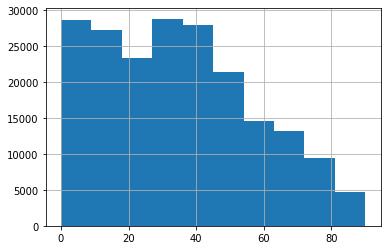

<IPython.core.display.Javascript object>

In [21]:
train_data.age.hist()

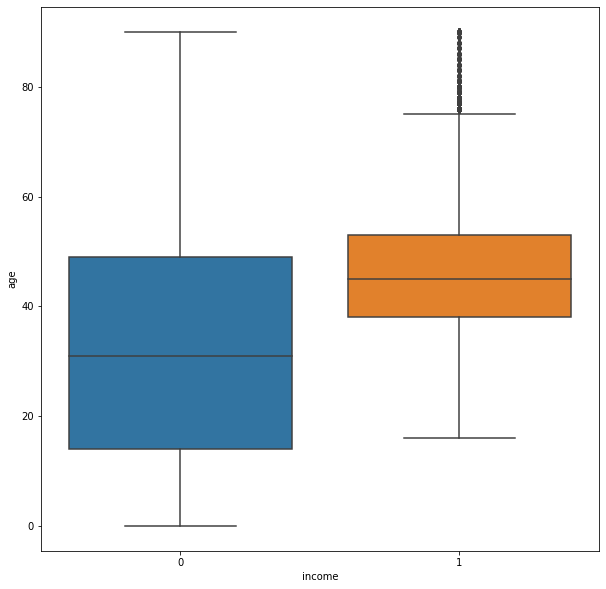

<IPython.core.display.Javascript object>

In [22]:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(x="income", y="age", data=train_data)
plt.show()

Box plots show that the age definitely has an impact on income.

In [23]:
# Breaking the ages into bins is more suitable
def age_adjuster(age):
    if age <= 18:
        return 1
    elif age >= 19 and age <= 35:
        return 2
    elif age >= 36 and age <= 66:
        return 3
    else:
        return 4


# Use the pandas `apply()` method by calling the function above
train_data["age_group"] = train_data["age"].apply(age_adjuster)
test_data["age_group"] = test_data["age"].apply(age_adjuster)

# Examine how many observations you have in each group
print(train_data.groupby("age_group")["income"].count())

age_group
1    58476
2    49679
3    70072
4    21296
Name: income, dtype: int64


<IPython.core.display.Javascript object>

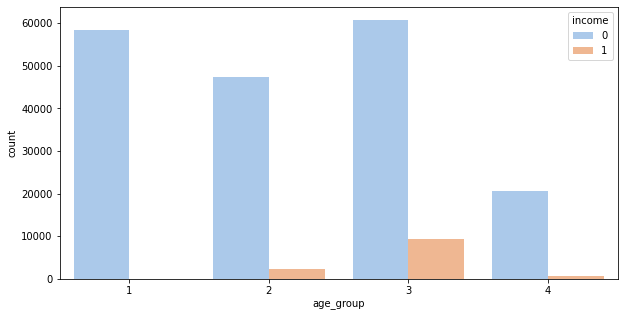

<IPython.core.display.Javascript object>

In [24]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("age_group", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

In [25]:
# dropping age column
train_data.drop(
    ["age"], axis=1, inplace=True,
)

test_data.drop(
    ["age"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## dividends_from_stocks

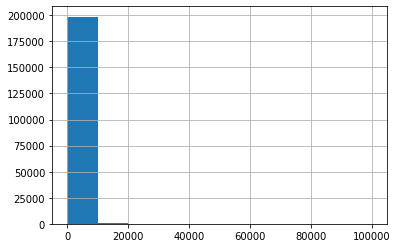

<IPython.core.display.Javascript object>

In [26]:
train_data.dividends_from_stocks.hist()

In [27]:
train_data.dividends_from_stocks.describe()

count    199523.000000
mean        197.529533
std        1984.163658
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: dividends_from_stocks, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
# Breaking the ages into bins is more suitable
def dividends_adjuster(dividends):
    if dividends == 0:
        return 0
    else:
        return 1


# Use the pandas `apply()` method by calling the function above
train_data["dividends_group"] = train_data["dividends_from_stocks"].apply(
    dividends_adjuster
)
test_data["dividends_group"] = test_data["dividends_from_stocks"].apply(
    dividends_adjuster
)

# Examine how many observations you have in each group
print(train_data.groupby("dividends_group")["income"].count())

dividends_group
0    178382
1     21141
Name: income, dtype: int64


<IPython.core.display.Javascript object>

Most people are not collecting any divends from stocks. So it would make sense to just make this a binary column instead dealing with continuous. 

In [29]:
# dropping age column
train_data.drop(
    ["dividends_from_stocks"], axis=1, inplace=True,
)

test_data.drop(
    ["dividends_from_stocks"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## Capital_gains and Capital_losses

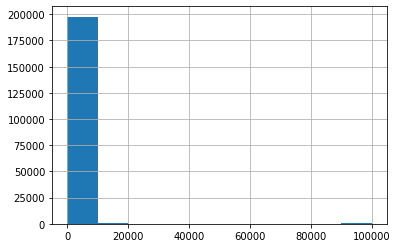

<IPython.core.display.Javascript object>

In [30]:
train_data.capital_gains.hist()

In [31]:
train_data.capital_gains.describe()

count    199523.00000
mean        434.71899
std        4697.53128
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       99999.00000
Name: capital_gains, dtype: float64

<IPython.core.display.Javascript object>

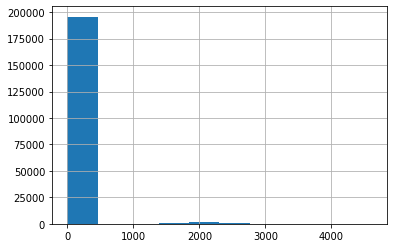

<IPython.core.display.Javascript object>

In [32]:
train_data.capital_losses.hist()

In [33]:
train_data.capital_losses.describe()

count    199523.000000
mean         37.313788
std         271.896428
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4608.000000
Name: capital_losses, dtype: float64

<IPython.core.display.Javascript object>

In [34]:
train_data["cap_profit"] = train_data["capital_gains"] - train_data["capital_losses"]
test_data["cap_profit"] = test_data["capital_gains"] - test_data["capital_losses"]

<IPython.core.display.Javascript object>

In [35]:
train_data.cap_profit.describe()

count    199523.000000
mean        397.405201
std        4708.839558
min       -4608.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       99999.000000
Name: cap_profit, dtype: float64

<IPython.core.display.Javascript object>

In [36]:
# Breaking the ages into bins is more suitable
def cap_adjuster(cap):
    if cap < 0:
        return 0
    elif cap == 0:
        return 1
    else:
        return 2


# Use the pandas `apply()` method by calling the function above
train_data["cap_group"] = train_data["cap_profit"].apply(cap_adjuster)
test_data["cap_group"] = test_data["cap_profit"].apply(cap_adjuster)

# Examine how many observations you have in each group
print(train_data.groupby("cap_group")["income"].count())

cap_group
0      3906
1    188238
2      7379
Name: income, dtype: int64


<IPython.core.display.Javascript object>

In [37]:
# dropping cap columns
train_data.drop(
    ["capital_gains", "capital_losses"], axis=1, inplace=True,
)

test_data.drop(
    ["capital_gains", "capital_losses"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## Wages

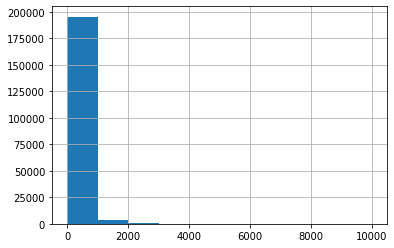

<IPython.core.display.Javascript object>

In [38]:
train_data.wage.hist()

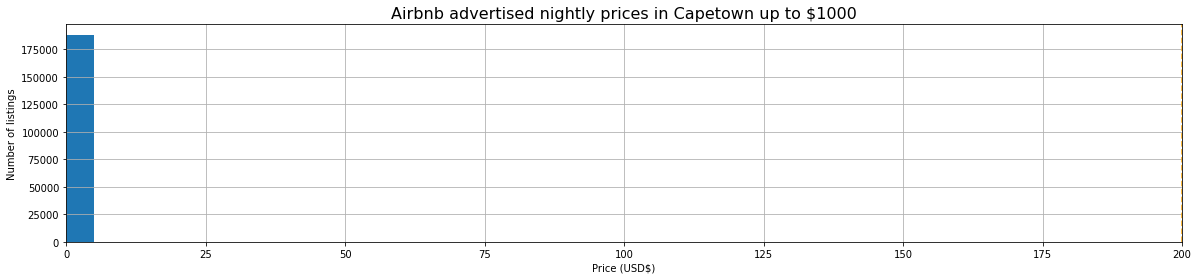

<IPython.core.display.Javascript object>

In [39]:
# Distribution of prices from $0 to $1000
plt.figure(figsize=(20, 4))
train_data.wage.hist(bins=20, range=(0, 100))
plt.margins(x=0)
plt.axvline(200, color="orange", linestyle="--")
plt.title("Airbnb advertised nightly prices in Capetown up to $1000", fontsize=16)
plt.xlabel("Price (USD$)")
plt.ylabel("Number of listings")
plt.show()

In [40]:
train_data.wage.nunique()

1240

<IPython.core.display.Javascript object>

In [41]:
# Breaking the ages into bins is more suitable
def wage_adjuster(wage):
    if wage == 0:
        return 0
    elif wage <= 5000:
        return 1
    else:
        return 2


# Use the pandas `apply()` method by calling the function above
train_data["wage_group"] = train_data["wage"].apply(wage_adjuster)
test_data["wage_group"] = test_data["wage"].apply(wage_adjuster)

# Examine how many observations you have in each group
print(train_data.groupby("wage_group")["income"].count())

wage_group
0    188219
1     11264
2        40
Name: income, dtype: int64


<IPython.core.display.Javascript object>

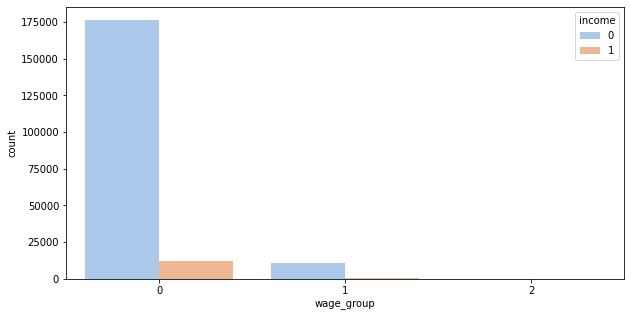

<IPython.core.display.Javascript object>

In [42]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("wage_group", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

Seems like alot of people are not reporting their incomes per hour because if you make 0 dollars and hour you shouldnt be making over a 50000 grand so the column will be dropped. 

In [43]:
train_data.sort_values(by=["wage"], ascending=False)

,industry,occupation,education,wage,relationship,race,sex,full_or_part_time_unemployment_stat,tax_filer_stat,detailed_household_summary_in_household,house_1yr,num_employers,citzenship,SEOTR,VETYN,weeks_worked,income,age_group,dividends_group,cap_profit,cap_group,wage_group
190936,45,11,Doctoratedegree(PhDEdD),9999,Nevermarried,White,Male,ChildrenorArmedForces,Single,Householder,Yes,3,Native-BornintheUnitedStates,0,2,52,1,3,0,0,1,2
25572,43,26,Associatesdegree-occup/vocational,9916,Married-civilianspousepresent,White,Female,ChildrenorArmedForces,Jointbothunder65,Spouseofhouseholder,Yes,5,Foreignborn-UScitizenbynaturalization,0,2,52,0,3,0,0,1,2
173067,42,31,9thgrade,9800,Married-civilianspousepresent,Other,Female,Full-timeschedules,Jointbothunder65,Otherrelativeofhouseholder,Notinuniverseunder1yearold,3,Native-BorninPuertoRicoorUSOutlying,0,2,52,0,3,1,0,1,2
97356,37,31,7thand8thgrade,9800,Separated,White,Female,ChildrenorArmedForces,Single,Householder,Yes,4,Foreignborn-UScitizenbynaturalization,0,2,52,0,3,0,0,1,2
84033,41,30,Highschoolgraduate,9400,Married-civilianspousepresent,White,Female,Full-timeschedules,Jointoneunder65&one65+,Spouseofhouseholder,Notinuniverseunder1yearold,4,Foreignborn-UScitizenbynaturalization,0,2,52,0,3,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68457,44,12,Bachelorsdegree(BAABBS),0,Married-civilianspousepresent,White,Female,ChildrenorArmedForces,Jointbothunder65,Spouseofhouseholder,Yes,5,Native-BornintheUnitedStates,2,2,52,0,2,0,0,1,0
68458,0,0,Children,0,Nevermarried,White,Male,ChildrenorArmedForces,Nonfiler,Childunder18nevermarried,No,0,Native-BornintheUnitedStates,0,0,0,0,1,0,0,1,0
68459,29,38,Highschoolgraduate,0,Nevermarried,Black,Male,ChildrenorArmedForces,Single,Householder,Yes,1,Native-BornintheUnitedStates,2,2,24,0,3,0,0,1,0
68460,13,33,Somecollegebutnodegree,0,Married-civilianspousepresent,White,Male,ChildrenorArmedForces,Jointbothunder65,Householder,No,4,Native-BornintheUnitedStates,0,2,52,0,3,0,0,1,0


<IPython.core.display.Javascript object>

In [44]:
# dropping wage columns
train_data.drop(
    ["wage", "wage_group"], axis=1, inplace=True,
)

test_data.drop(
    ["wage", "wage_group"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

# Categorical Columns

## Industry

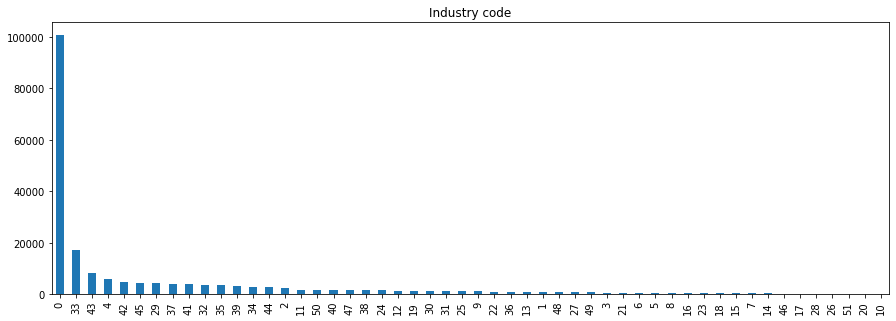

<IPython.core.display.Javascript object>

In [45]:
train_data.industry.value_counts().plot.bar(figsize=(15, 5), title="Industry code")

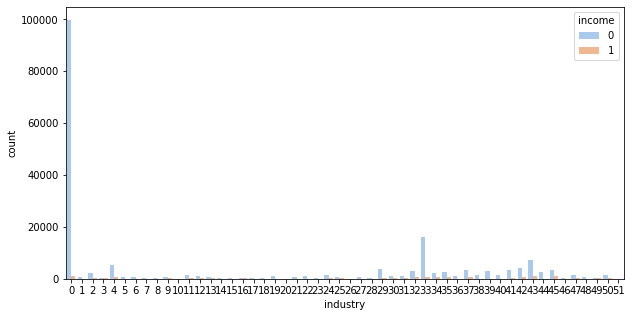

<IPython.core.display.Javascript object>

In [46]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("industry", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

Industry definitely seems to have an effect so will this be one hot encoded. 

## Education 

Choosing to adjust the education status a little bit so the data can be consolidated a little. 

In [47]:
# for people that didnt finish high school
some_hs = ["11thgrade", "10thgrade", "9thgrade", "12thgrade", "12thgradenodiploma"]
# Choose to count 7th and 8th grade as elementary
elementary = [
    "1st2nd3rdor4thgrade",
    "5thor6thgrade",
    "7thand8thgrade",
    "Lessthan1stgrade",
]
# associate degree holders
associates = ["Associatesdegree-occup/vocational", "Associatesdegree-academicprogram"]
# higher than bach degree holders
post_grad = [
    "Mastersdegree(MAMSMEngMEdMSWMBA)",
    "Profschooldegree(MDDDSDVMLLBJD)",
    "Doctoratedegree(PhDEdD)",
]
# shortening bach degreee
bach_degree = ["Bachelorsdegree(BAABBS)"]

# replace elements in list.
train_data["education"].replace(to_replace=some_hs, value="some_hs", inplace=True)
train_data["education"].replace(
    to_replace=elementary, value="elementary_school", inplace=True
)
train_data["education"].replace(to_replace=associates, value="associates", inplace=True)
train_data["education"].replace(to_replace=post_grad, value="postgrad", inplace=True)
train_data["education"].replace(
    to_replace=bach_degree, value="bachdegree", inplace=True
)

train_data.education.value_counts()

Highschoolgraduate        48407
Children                  47422
Somecollegebutnodegree    27820
some_hs                   22789
bachdegree                19865
elementary_school         13902
associates                 9721
postgrad                   9597
Name: education, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
# for people that didnt finish high school
some_hs = ["11thgrade", "10thgrade", "9thgrade", "12thgrade", "12thgradenodiploma"]
# Choose to count 7th and 8th grade as elementary
elementary = [
    "1st2nd3rdor4thgrade",
    "5thor6thgrade",
    "7thand8thgrade",
    "Lessthan1stgrade",
]
# associate degree holders
associates = ["Associatesdegree-occup/vocational", "Associatesdegree-academicprogram"]
# higher than bach degree holders
post_grad = [
    "Mastersdegree(MAMSMEngMEdMSWMBA)",
    "Profschooldegree(MDDDSDVMLLBJD)",
    "Doctoratedegree(PhDEdD)",
]
# shortening bach degreee
bach_degree = ["Bachelorsdegree(BAABBS)"]

# replace elements in list.
test_data["education"].replace(to_replace=some_hs, value="some_hs", inplace=True)
test_data["education"].replace(
    to_replace=elementary, value="elementary_school", inplace=True
)
test_data["education"].replace(to_replace=associates, value="associates", inplace=True)
test_data["education"].replace(to_replace=post_grad, value="postgrad", inplace=True)
test_data["education"].replace(to_replace=bach_degree, value="bachdegree", inplace=True)

test_data.education.value_counts()

Highschoolgraduate        24147
Children                  23442
Somecollegebutnodegree    13954
some_hs                   11578
bachdegree                 9885
elementary_school          7185
postgrad                   4802
associates                 4769
Name: education, dtype: int64

<IPython.core.display.Javascript object>

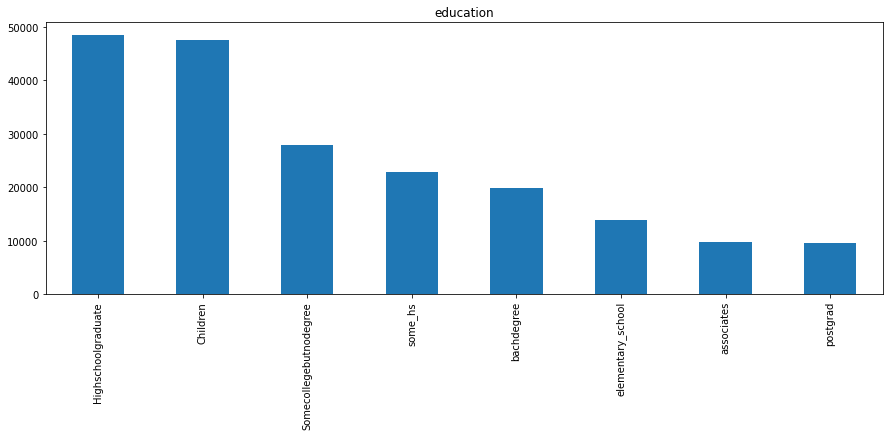

<IPython.core.display.Javascript object>

In [49]:
# data breakdown after recategorizing
train_data.education.value_counts().plot.bar(figsize=(15, 5), title="education")

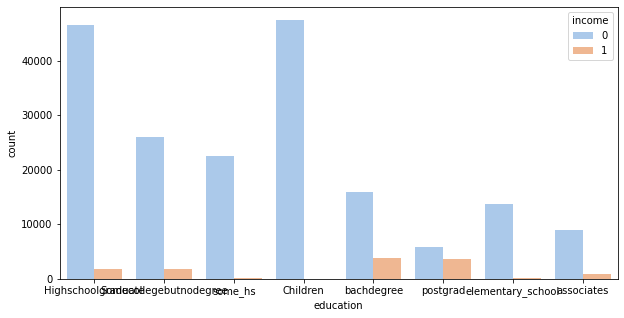

<IPython.core.display.Javascript object>

In [50]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("education", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

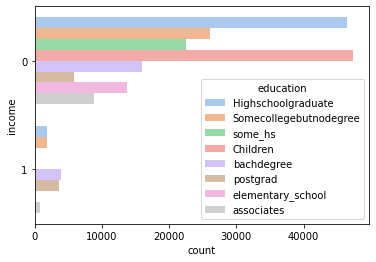

<IPython.core.display.Javascript object>

In [51]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="education", data=train_data, palette="pastel")
plt.show()

## Relationship

In [52]:
married = [
    "Married-spouseabsent",
    "Married-civ-spouse",
    "Married-AF-spouse",
    "Married-civilianspousepresent",
    "Married-AFspousepresent",
]
separated = ["Separated", "Divorced"]

# replace elements in list.
train_data["relationship"].replace(to_replace=married, value="Married", inplace=True)
train_data["relationship"].replace(
    to_replace=separated, value="Separated", inplace=True
)

train_data["relationship"].value_counts()

Nevermarried    86485
Married         86405
Separated       16170
Widowed         10463
Name: relationship, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
married = [
    "Married-spouseabsent",
    "Married-civ-spouse",
    "Married-AF-spouse",
    "Married-civilianspousepresent",
    "Married-AFspousepresent",
]
separated = ["Separated", "Divorced"]

# replace elements in list.
test_data["relationship"].replace(to_replace=married, value="Married", inplace=True)
test_data["relationship"].replace(to_replace=separated, value="Separated", inplace=True)

test_data["relationship"].value_counts()

Married         43148
Nevermarried    43143
Separated        8146
Widowed          5325
Name: relationship, dtype: int64

<IPython.core.display.Javascript object>

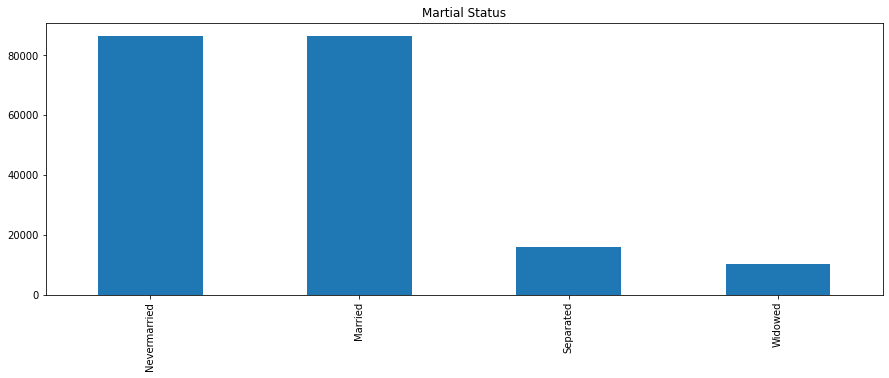

<IPython.core.display.Javascript object>

In [54]:
train_data.relationship.value_counts().plot.bar(figsize=(15, 5), title="Martial Status")

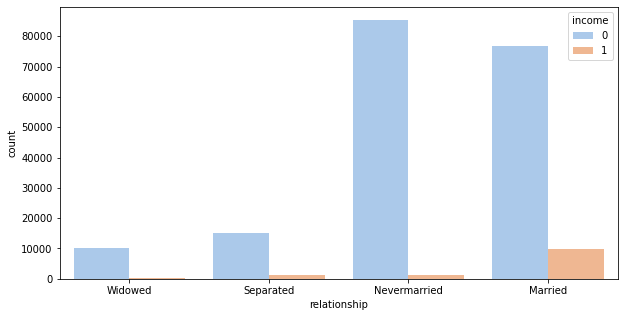

<IPython.core.display.Javascript object>

In [55]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("relationship", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

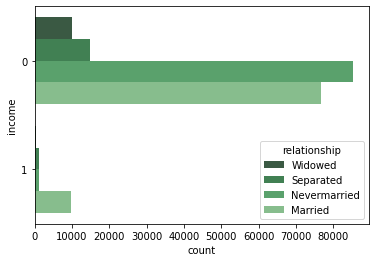

<IPython.core.display.Javascript object>

In [56]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="relationship", data=train_data, palette="Greens_d")
plt.show()

## Race

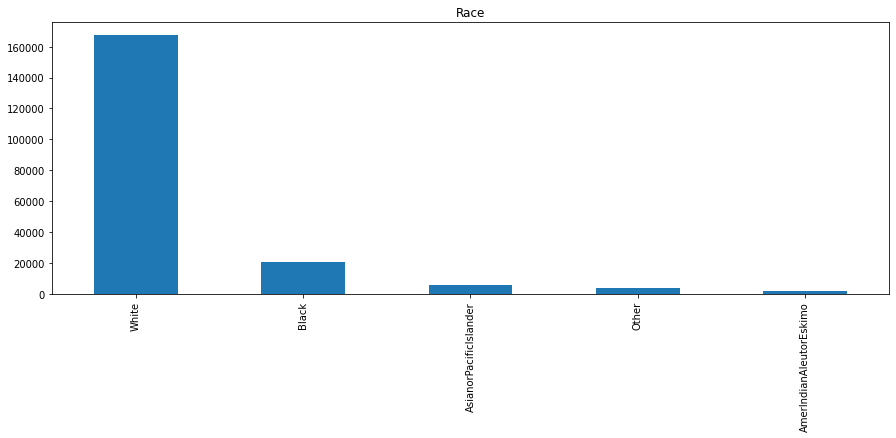

<IPython.core.display.Javascript object>

In [57]:
train_data.race.value_counts().plot.bar(figsize=(15, 5), title="Race")

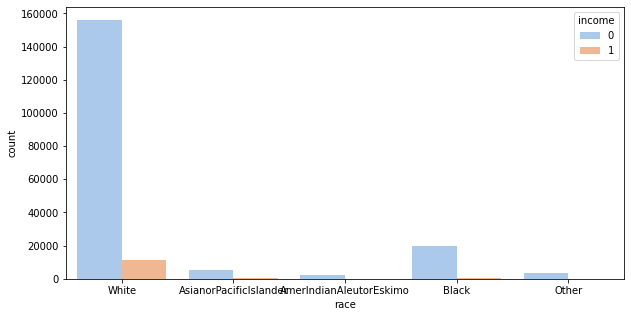

<IPython.core.display.Javascript object>

In [58]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("race", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

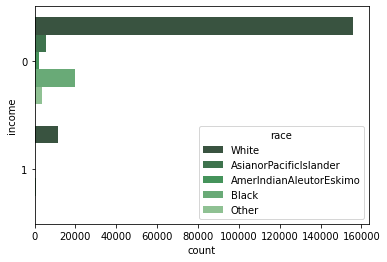

<IPython.core.display.Javascript object>

In [59]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="race", data=train_data, palette="Greens_d")
plt.show()

In [60]:
# dropping wage columns
train_data.drop(
    ["race"], axis=1, inplace=True,
)

test_data.drop(
    ["race"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## citzenship

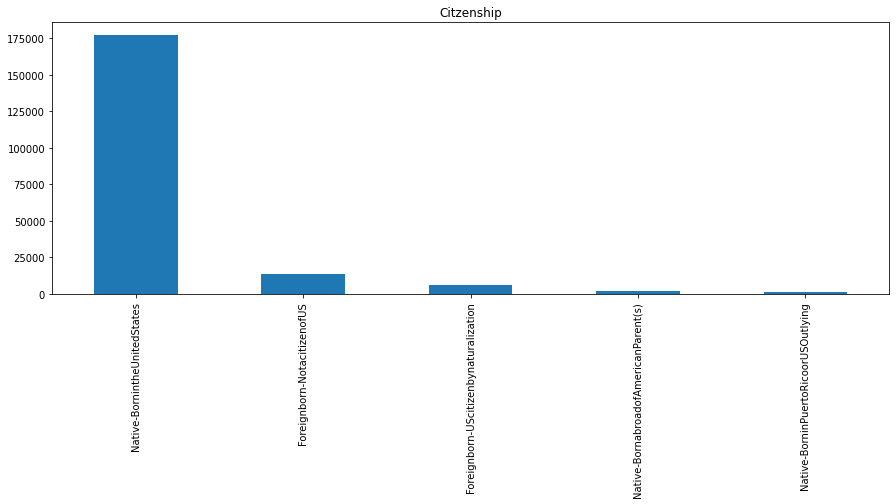

<IPython.core.display.Javascript object>

In [61]:
train_data.citzenship.value_counts().plot.bar(figsize=(15, 5), title="Citzenship")

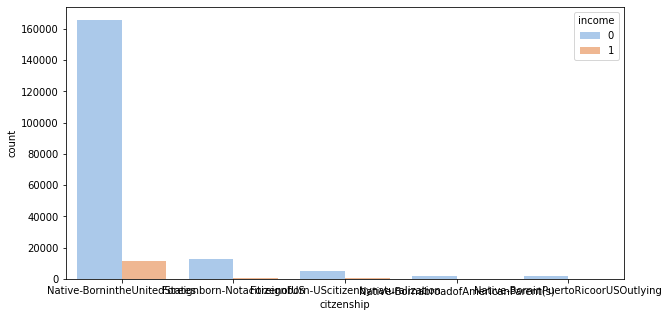

<IPython.core.display.Javascript object>

In [62]:
# Plot counts for each combination of levels.
fig = plt.figure(figsize=(10, 5))
sns.countplot("citzenship", hue="income", data=train_data, palette="pastel")
plt.tight_layout
plt.show()

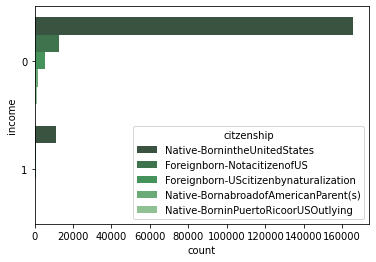

<IPython.core.display.Javascript object>

In [63]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="citzenship", data=train_data, palette="Greens_d")
plt.show()

## SEOTR(Own-biz or self employed)

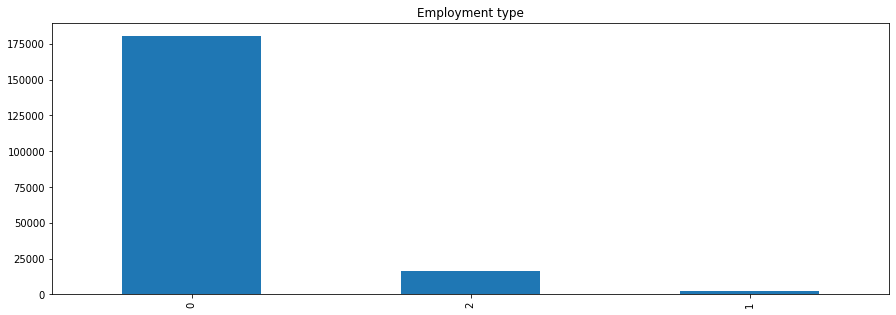

<IPython.core.display.Javascript object>

In [64]:
train_data.SEOTR.value_counts().plot.bar(figsize=(15, 5), title="Employment type")

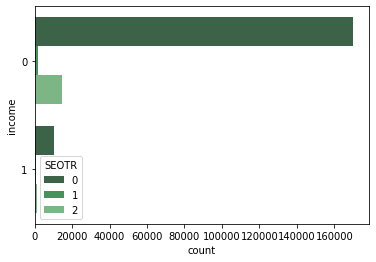

<IPython.core.display.Javascript object>

In [65]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="SEOTR", data=train_data, palette="Greens_d")
plt.show()

## VETYN

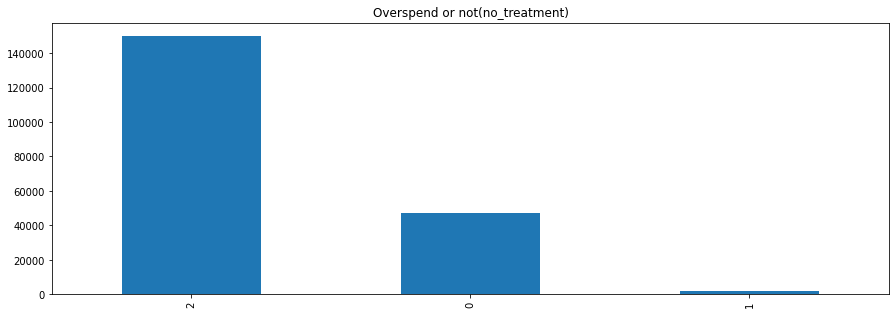

<IPython.core.display.Javascript object>

In [66]:
train_data.VETYN.value_counts().plot.bar(
    figsize=(15, 5), title="Overspend or not(no_treatment)"
)

In [67]:
train_data["VETYN"].value_counts()

2    150130
0     47409
1      1984
Name: VETYN, dtype: int64

<IPython.core.display.Javascript object>

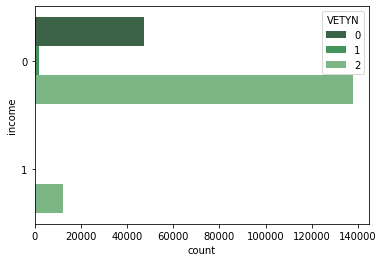

<IPython.core.display.Javascript object>

In [68]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="VETYN", data=train_data, palette="Greens_d")
plt.show()

## sex 

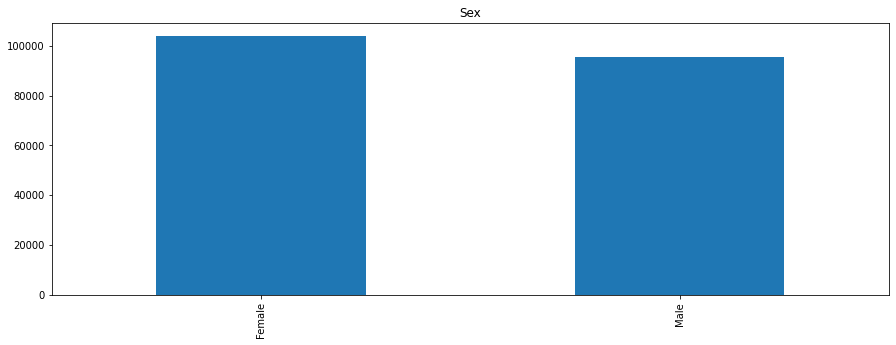

<IPython.core.display.Javascript object>

In [69]:
train_data.sex.value_counts().plot.bar(figsize=(15, 5), title="Sex")

In [70]:
# Create crosstab of gender by race/ethnicity
count_table = pd.crosstab(train_data["sex"], train_data["income"])
count_table

income,0,1
sex,,
Female,101321,2663
Male,85820,9719


<IPython.core.display.Javascript object>

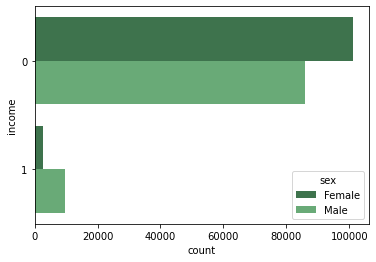

<IPython.core.display.Javascript object>

In [71]:
# Plot counts for each combination of levels.
sns.countplot(y="income", hue="sex", data=train_data, palette="Greens_d")
plt.show()

## full or part time unemployment status

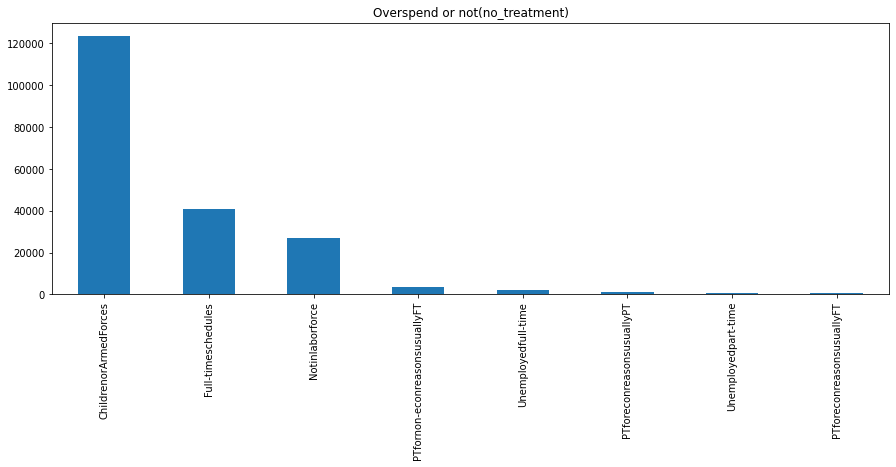

<IPython.core.display.Javascript object>

In [72]:
train_data.full_or_part_time_unemployment_stat.value_counts().plot.bar(
    figsize=(15, 5), title="Overspend or not(no_treatment)"
)

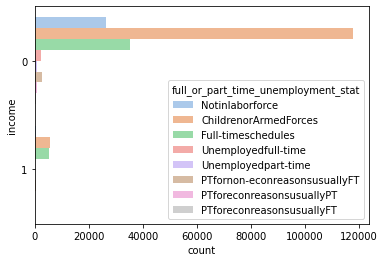

<IPython.core.display.Javascript object>

In [73]:
# Plot counts for each combination of levels.
sns.countplot(
    y="income",
    hue="full_or_part_time_unemployment_stat",
    data=train_data,
    palette="pastel",
)
plt.show()

In [74]:
train_data = train_data.drop(["full_or_part_time_unemployment_stat"], axis=1)
test_data = test_data.drop(["full_or_part_time_unemployment_stat"], axis=1)

<IPython.core.display.Javascript object>

## tax_filer_stat

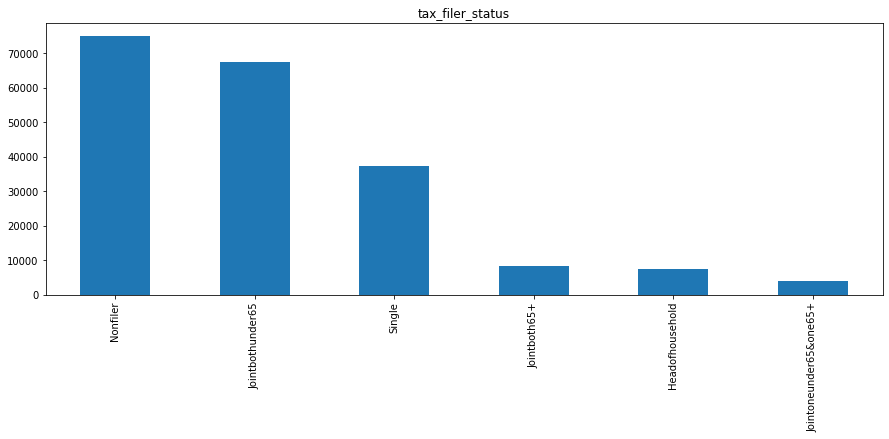

<IPython.core.display.Javascript object>

In [75]:
train_data.tax_filer_stat.value_counts().plot.bar(
    figsize=(15, 5), title="tax_filer_status"
)

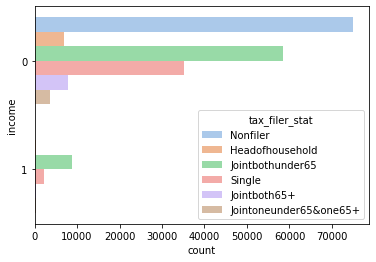

<IPython.core.display.Javascript object>

In [76]:
# Plot counts for each combination of levels.
sns.countplot(
    y="income", hue="tax_filer_stat", data=train_data, palette="pastel",
)
plt.show()

## house_1yr

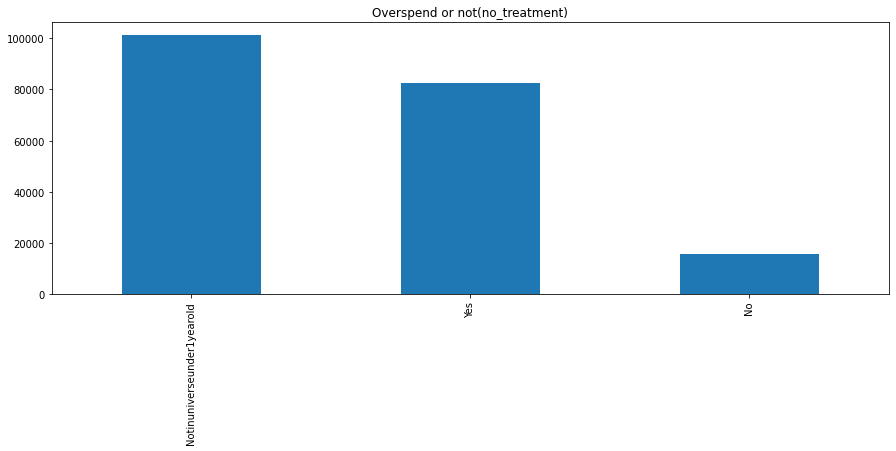

<IPython.core.display.Javascript object>

In [77]:
train_data.house_1yr.value_counts().plot.bar(
    figsize=(15, 5), title="Overspend or not(no_treatment)"
)

In [78]:
train_data = train_data.drop(["house_1yr"], axis=1)

<IPython.core.display.Javascript object>

In [79]:
test_data = test_data.drop(["house_1yr"], axis=1)

<IPython.core.display.Javascript object>

In [80]:
train_data = train_data.drop(["detailed_household_summary_in_household"], axis=1)
test_data = test_data.drop(["detailed_household_summary_in_household"], axis=1)

<IPython.core.display.Javascript object>

In [81]:
# Columns that were kept
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 16 columns):
industry           199523 non-null int64
occupation         199523 non-null int64
education          199523 non-null object
relationship       199523 non-null object
sex                199523 non-null object
tax_filer_stat     199523 non-null object
num_employers      199523 non-null int64
citzenship         199523 non-null object
SEOTR              199523 non-null int64
VETYN              199523 non-null int64
weeks_worked       199523 non-null int64
income             199523 non-null int64
age_group          199523 non-null int64
dividends_group    199523 non-null int64
cap_profit         199523 non-null int64
cap_group          199523 non-null int64
dtypes: int64(11), object(5)
memory usage: 24.4+ MB


<IPython.core.display.Javascript object>

Summary:Columns kept 

1. Sex:- Out of total male 30% of them earn salary more than 50K while less than 15% female earn more than 50K. 89% female earn less than 50K
2. Race:- White and asain-pac-Islander earn salary more than 50K
3. marital_status :- 41% of married people seem to earn salary greater than 50K.
4. People having degree doctorate,prof-school,masters are making salary more than 50K.
5. Out of all the workclass only 59% self employed people are making salary more than 50K.
6. If I check by occupation, Proportion of people making salary less than 50K is higher.

# Correlation Heatmap

In [82]:
corrmat_train = train_data.corr()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'correlation matrix (Income)')

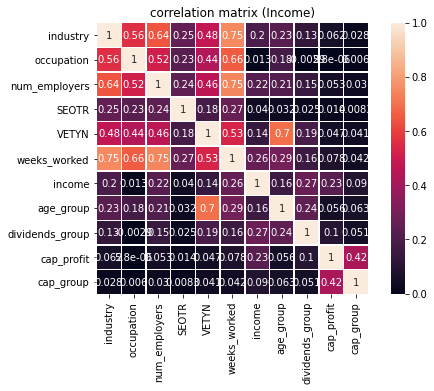

<IPython.core.display.Javascript object>

In [83]:


# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_train, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Income)")


In [84]:
train_data = train_data.drop(["VETYN", "weeks_worked", "cap_profit"], axis=1)
test_data = test_data.drop(["VETYN", "weeks_worked", "cap_profit"], axis=1)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'correlation matrix (Income)')

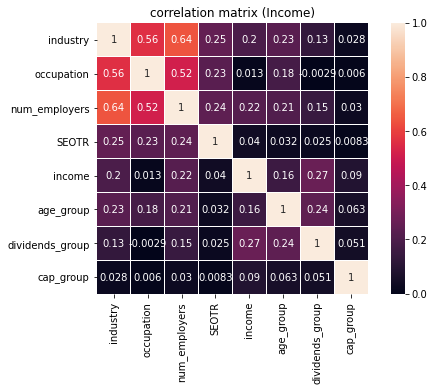

<IPython.core.display.Javascript object>

In [85]:
corrmat_train = train_data.corr()

# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_train, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Income)")


# Data for ML Algos 

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 13 columns):
industry           199523 non-null int64
occupation         199523 non-null int64
education          199523 non-null object
relationship       199523 non-null object
sex                199523 non-null object
tax_filer_stat     199523 non-null object
num_employers      199523 non-null int64
citzenship         199523 non-null object
SEOTR              199523 non-null int64
income             199523 non-null int64
age_group          199523 non-null int64
dividends_group    199523 non-null int64
cap_group          199523 non-null int64
dtypes: int64(8), object(5)
memory usage: 19.8+ MB


<IPython.core.display.Javascript object>

In [87]:
# Encode character string categorical data into numeric data using one-hot encoding
df_encoded = pd.concat(
    [train_data, pd.get_dummies(train_data["education"], drop_first=True)], axis=1
)
df_encoded = pd.concat(
    [df_encoded, pd.get_dummies(train_data["relationship"], drop_first=True)], axis=1
)
df_encoded = pd.concat(
    [df_encoded, pd.get_dummies(train_data["sex"], drop_first=True)], axis=1
)

df_encoded = pd.concat(
    [df_encoded, pd.get_dummies(train_data["tax_filer_stat"], drop_first=True)], axis=1
)

df_encoded = pd.concat(
    [df_encoded, pd.get_dummies(train_data["citzenship"], drop_first=True)], axis=1
)

# Drop the character columns
df_encoded.drop(
    ["education", "relationship", "sex", "tax_filer_stat", "citzenship",],
    axis=1,
    inplace=True,
)


# Separate features and target
X_train = df_encoded.drop(["income"], axis=1)
y_train = df_encoded["income"]

print(X_train.shape)
print(y_train.shape)

(199523, 27)
(199523,)


<IPython.core.display.Javascript object>

In [88]:
# Encode character string categorical data into numeric data using one-hot encoding
df_encoded_test = pd.concat(
    [test_data, pd.get_dummies(test_data["education"], drop_first=True)], axis=1
)
df_encoded_test = pd.concat(
    [df_encoded_test, pd.get_dummies(test_data["relationship"], drop_first=True)],
    axis=1,
)
df_encoded_test = pd.concat(
    [df_encoded_test, pd.get_dummies(test_data["sex"], drop_first=True)], axis=1
)

df_encoded_test = pd.concat(
    [df_encoded_test, pd.get_dummies(test_data["tax_filer_stat"], drop_first=True)],
    axis=1,
)

df_encoded_test = pd.concat(
    [df_encoded_test, pd.get_dummies(test_data["citzenship"], drop_first=True)], axis=1
)

# Drop the character columns
df_encoded_test.drop(
    ["education", "relationship", "sex", "tax_filer_stat", "citzenship",],
    axis=1,
    inplace=True,
)

# Separate features and target
X_test = df_encoded_test.drop(["income"], axis=1)
y_test = df_encoded_test["income"]

print(X_test.shape)
print(y_test.shape)

(99762, 27)
(99762,)


<IPython.core.display.Javascript object>

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 27 columns):
industry                                 99762 non-null int64
occupation                               99762 non-null int64
num_employers                            99762 non-null int64
SEOTR                                    99762 non-null int64
age_group                                99762 non-null int64
dividends_group                          99762 non-null int64
cap_group                                99762 non-null int64
Highschoolgraduate                       99762 non-null uint8
Somecollegebutnodegree                   99762 non-null uint8
associates                               99762 non-null uint8
bachdegree                               99762 non-null uint8
elementary_school                        99762 non-null uint8
postgrad                                 99762 non-null uint8
some_hs                                  99762 non-null uint8
Nevermarried           

<IPython.core.display.Javascript object>

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

<IPython.core.display.Javascript object>

In [91]:
X_train.head()


,industry,occupation,num_employers,SEOTR,age_group,dividends_group,cap_group,Highschoolgraduate,Somecollegebutnodegree,associates,bachdegree,elementary_school,postgrad,some_hs,Nevermarried,Separated,Widowed,Male,Jointboth65+,Jointbothunder65,Jointoneunder65&one65+,Nonfiler,Single,Foreignborn-UScitizenbynaturalization,Native-BornabroadofAmericanParent(s),Native-BorninPuertoRicoorUSOutlying,Native-BornintheUnitedStates
0,-0.849740,-0.782235,-0.827096,-0.316851,1.730616,-0.344261,-0.073388,1.766856,-0.402522,-0.226311,-0.332522,-0.273669,-0.224789,-0.359089,-0.874698,-0.296969,4.250810,-0.958533,-0.208757,-0.714098,-0.140585,1.287236,-0.480467,-0.173874,-0.094229,-0.087587,0.356791
1,-0.628343,1.570028,-0.404284,-0.316851,0.729341,-0.344261,-0.073388,-0.565977,2.484336,-0.226311,-0.332522,-0.273669,-0.224789,-0.359089,-0.874698,3.367356,-0.235249,1.043261,-0.208757,-0.714098,-0.140585,-0.776858,-0.480467,-0.173874,-0.094229,-0.087587,0.356791
2,-0.849740,-0.782235,-0.827096,-0.316851,-1.273209,-0.344261,-0.073388,-0.565977,-0.402522,-0.226311,-0.332522,-0.273669,-0.224789,2.784822,1.143252,-0.296969,-0.235249,-0.958533,-0.208757,-0.714098,-0.140585,1.287236,-0.480467,-0.173874,-0.094229,-0.087587,-2.802764
3,-0.849740,-0.782235,-0.827096,-0.316851,-1.273209,-0.344261,-0.073388,-0.565977,-0.402522,-0.226311,-0.332522,-0.273669,-0.224789,-0.359089,1.143252,-0.296969,-0.235249,-0.958533,-0.208757,-0.714098,-0.140585,1.287236,-0.480467,-0.173874,-0.094229,-0.087587,0.356791
4,-0.849740,-0.782235,-0.827096,-0.316851,-1.273209,-0.344261,-0.073388,-0.565977,-0.402522,-0.226311,-0.332522,-0.273669,-0.224789,-0.359089,1.143252,-0.296969,-0.235249,-0.958533,-0.208757,-0.714098,-0.140585,1.287236,-0.480467,-0.173874,-0.094229,-0.087587,0.356791


<IPython.core.display.Javascript object>

# Train and Fine Tuning on the model 

In [99]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

<IPython.core.display.Javascript object>

## Support_vector_machine

In [93]:
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)

Y_pred = svm.predict(X_test)

<IPython.core.display.Javascript object>

In [94]:
acc_linear_svc = round(svm.score(X_train, y_train) * 100, 2)

<IPython.core.display.Javascript object>

## Random Forest

In [95]:
# Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100, random_state=20)
random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

<IPython.core.display.Javascript object>

## Logistic Regression

In [96]:
# Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\Kwasi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>

## KNN

In [97]:
"""Wanted to run this but computer gets hung up for whatever reaseon 
#knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)"""

'Wanted to run this but computer gets hung up for whatever reaseon \n#knn = KNeighborsClassifier(n_neighbors = 3)\nknn.fit(X_train, y_train) \nY_pred = knn.predict(X_test)\nacc_knn = round(knn.score(X_train, y_train) * 100, 2)'

<IPython.core.display.Javascript object>

## GaussianNB algorithm

In [100]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

<IPython.core.display.Javascript object>

## Decision Tree algorithm

In [101]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

<IPython.core.display.Javascript object>

# Accuracy of Models

In [102]:
# Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame(
    {
        "Model": [
            "Support Vector Machines",
            "Logistic Regression",
            "Random Forest",
            "Naive Bayes",
            "Decision Tree",
        ],
        "Score": [
            acc_linear_svc,
            acc_log,
            acc_random_forest,
            acc_gaussian,
            acc_decision_tree,
        ],
    }
)
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(7)

,Model
Score,
98.22,Random Forest
98.22,Decision Tree
94.55,Logistic Regression
94.45,Support Vector Machines
74.08,Naive Bayes


<IPython.core.display.Javascript object>

In [105]:
# Finding significance of each feature in t5he best fit model

importances = pd.DataFrame(
    {
        "feature": X_train.columns,
        "importance": np.round(random_forest.feature_importances_, 3),
    }
)
importances = importances.sort_values("importance", ascending=False).set_index(
    "feature"
)
importances.head(30)

,importance
feature,
industry,0.226
occupation,0.212
num_employers,0.110
postgrad,0.067
dividends_group,0.058
cap_group,0.057
Male,0.054
age_group,0.035
SEOTR,0.034


<IPython.core.display.Javascript object>

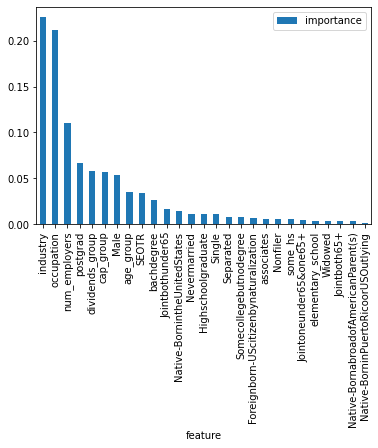

<IPython.core.display.Javascript object>

In [104]:
# Plotting the significance of each feautre

importances.plot.bar()

# Conclusion 

The best two performing models were able to predict with 98.22% accuracy. Which is solid considering the naive model was at 74%.

Future Work
I think that are several ways to look more into peoples earning pouplation with other demographic information. A more detailed "race" category would be intresting to look into. To explore the differences between different subgroups. As well going more in depth in these two winning models and seeing if some extra accuracy can be squeezed out. 

Also some more detailed information on graduate degree types would be intresting because a Engineering degree significantly enhancing earning potential then say a degree in Art history. 